# KMEANS CLUSTERING AND PCA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Importing and Formatting Dataset for Kmeans Clustering 

In [3]:
cluster_df = pd.read_csv('weatherAUS.csv')
cluster_df.drop('Date' ,axis =1, inplace=True)
cluster_df.drop('Location' ,axis =1, inplace=True)
cluster_df.drop('WindGustDir' ,axis =1, inplace=True)
cluster_df.drop('WindDir9am' ,axis =1, inplace=True)
cluster_df.drop('WindDir3pm' ,axis =1, inplace=True)
cluster_df.replace('Yes',1,inplace=True)
cluster_df.replace('No',0,inplace=True)
cluster_df.fillna(0,inplace = True)
#Feature Scaling using Z-Score Normalization
mean = cluster_df.mean()
std = cluster_df.std()
cluster_df = (cluster_df - mean)/std
data = cluster_df.to_numpy() # Creating a Numpy array to store the Dataset for use in the KMeans algorithm
cluster_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.205232,-0.016205,-0.203580,-0.746513,-0.845386,0.407794,0.681280,0.628380,0.160852,-1.251086,0.307740,0.312969,1.679571,-0.875690,0.017246,0.085732,-0.529794,-0.529762
1,-0.720310,0.280779,-0.275096,-0.746513,-0.845386,0.407794,-1.097761,0.409058,-1.125606,-1.116764,0.317090,0.315234,-0.874267,-0.875690,0.061940,0.413154,-0.529794,-0.529762
2,0.128103,0.361775,-0.275096,-0.746513,-0.845386,0.527920,0.570090,0.847702,-1.411485,-0.892894,0.307418,0.318146,-0.874267,-0.219634,0.628054,0.269088,-0.529794,-0.529762
3,-0.442647,0.672258,-0.275096,-0.746513,-0.845386,-0.793460,-0.319430,-1.016536,-1.077959,-1.519731,0.339660,0.331411,-0.874267,-0.875690,0.196019,0.701286,-0.529794,-0.529762
4,0.837685,1.252727,-0.155903,-0.746513,-0.845386,0.227606,-0.764190,0.189736,0.684964,-0.758571,0.317735,0.309410,1.360341,1.748534,0.151326,1.120387,-0.529794,-0.529762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,-1.429891,0.051292,-0.275096,-0.746513,-0.845386,-0.373021,-0.097050,-0.797214,-0.792080,-1.161538,0.362230,0.355676,-0.874267,-0.875690,-0.995800,0.164313,-0.529794,-0.529762
145456,-1.306486,0.307778,-0.275096,-0.746513,-0.845386,-0.913585,-0.097050,-1.016536,-0.553847,-1.295860,0.358683,0.351794,-0.874267,-0.875690,-0.876618,0.439348,-0.529794,-0.529762
145457,-1.028823,0.523766,-0.275096,-0.746513,-0.845386,-0.012645,-0.541810,-1.016536,-0.696786,-1.161538,0.350623,0.344352,-0.874267,-0.875690,-0.638254,0.648898,-0.529794,-0.529762
145458,-0.658607,0.537265,-0.275096,-0.746513,-0.845386,-0.553209,-0.097050,-1.235858,-0.792080,-1.161538,0.345464,0.343382,0.083422,-0.219634,-0.250913,0.635801,-0.529794,-0.529762


# Creating Function to Calculate the Euclidean Distance between the Instances and the Centroids

In [6]:
def EuclDistance(centroids,instance):
    distance = np.sqrt(np.sum((centroids - instance)**2, axis=1))
    return distance

# Creating Function to Calculate the Inertia(Mean Squared Distance) for different values of k

In [5]:

def Calc_Inertia(data, centroids, labels):
    inertia = 0

    for i in range(len(centroids)):
        cluster_points = data[labels == i] # Checking the cluster to which the instance belongs 
        inertia += np.sum((cluster_points - centroids[i]) ** 2)/len(data) # Calculating the Mean Squared Distance i.e. Inertia

    return inertia


# KMeans Algorithm

In [11]:
def KMeans(df,k,epochs):
    centroids = np.random.uniform(np.amin(data,axis=0),np.amax(data,axis=0),size=(k,data.shape[1])) # Intializing random centroids 
    #print("The initial centroids are:")
    #print(centroids)
    for i in range(epochs):
        Labels = [] # Creating list to store the Labels of different Instances
        for instance in df:
            distance = EuclDistance(centroids,instance) # Calculaing Euclidean Distance between given instance and centroids
            k_nearest = np.argmin(distance) # Checking which centroid is closest to the given Instance
            Labels.append(k_nearest) # Labeling the given Instance
        Labels = np.array(Labels)
        cluster_instances = [ ] # Creating a list to store the indices of the instances which belong to given cluster
        for j in range(k):
            cluster_instances.append(np.argwhere(Labels==(j))) # Checking which instances belongs to the given cluster
        cluster_centers = [ ] # Creating a list to store the centers of the clusters 
        for j,instance in enumerate(cluster_instances):
            if len(instance) == 0: # If the no. of instances belonging the cluster is 0, then the cluster center kept as the random centroid
                cluster_centers.append(centroids[j]) 
            else:    
                cluster_centers.append(np.mean(data[instance],axis=0)[0]) # Calculating the mean of the positions 
                                                                          # of the instance belonging to the cluster
        if np.abs(np.max((centroids - np.array(cluster_centers))))<0.00000001: # if the change between the cluster centers calculated and the
                                                                               # previous centroids is very smallthen the loop is stopped
            break
        else:
            centroids = np.array(cluster_centers) # If change is not negligible then the Centroids are updated
    #print("The final centroids are:")    
    #print(centroids)
    return Labels,centroids


# Calculating and Storing the Inertia for values of k ranging from 1 to 7

In [12]:
Inertia = [ ] # Creating a List to store the values of Inertia for different values of K
for k in range(1,8):
    epochs = 500
    Labels,centroids = KMeans(data, k, epochs)
    Inertia.append(Calc_Inertia(data,centroids,Labels))    

In [13]:
Inertia_df = pd.DataFrame(Inertia)
Inertia_df.rename(columns={0: 'Inertia'}, inplace=True)
Inertia_df.insert(loc = 0, column='No of Clusters', value=[1,2,3,4,5,6,7])
Inertia_df

,No of Clusters,Inertia
0,1,17.999876
1,2,15.166431
2,3,13.543350
3,4,11.841602
4,5,11.225911
5,6,10.835543
6,7,10.236007


# Plotting the Elbow Method Plot for the no of clusters ranging from 1 to 7

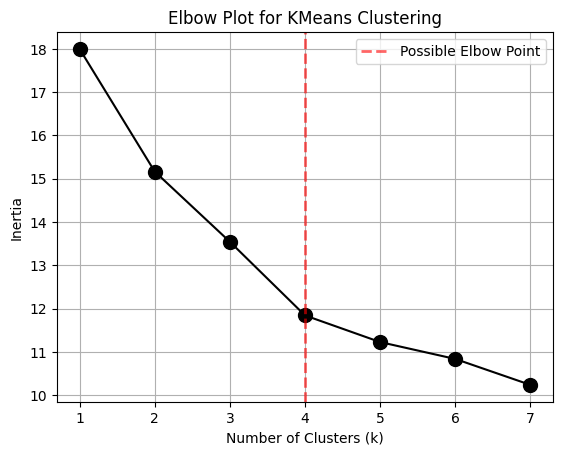

In [27]:
plt.plot(range(1,8), Inertia, marker='o',markersize = 10, linestyle='-', color='black')
plt.title('Elbow Plot for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1,8))
plt.axvline(x=4, color='red', linestyle='--', linewidth=2,alpha = 0.6,label = 'Possible Elbow Point')
plt.legend()
plt.grid(True)
plt.show()

# Running the KMeans Algorithm for the given Dataset and No. Of Clusters = 4

In [28]:
k=4
epochs = 500
Labels,centroids = KMeans(data, k, epochs) # Obtaining the Labels for instances belonging to the Dataset and the centroids of the clusters

In [29]:
cluster_df['Assigned Cluster'] = Labels+1
cluster_df


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Assigned Cluster
0,0.205232,-0.016205,-0.203580,-0.746513,-0.845386,0.407794,0.681280,0.628380,0.160852,-1.251086,0.307740,0.312969,1.679571,-0.875690,0.017246,0.085732,-0.529794,-0.529762,3
1,-0.720310,0.280779,-0.275096,-0.746513,-0.845386,0.407794,-1.097761,0.409058,-1.125606,-1.116764,0.317090,0.315234,-0.874267,-0.875690,0.061940,0.413154,-0.529794,-0.529762,3
2,0.128103,0.361775,-0.275096,-0.746513,-0.845386,0.527920,0.570090,0.847702,-1.411485,-0.892894,0.307418,0.318146,-0.874267,-0.219634,0.628054,0.269088,-0.529794,-0.529762,1
3,-0.442647,0.672258,-0.275096,-0.746513,-0.845386,-0.793460,-0.319430,-1.016536,-1.077959,-1.519731,0.339660,0.331411,-0.874267,-0.875690,0.196019,0.701286,-0.529794,-0.529762,3
4,0.837685,1.252727,-0.155903,-0.746513,-0.845386,0.227606,-0.764190,0.189736,0.684964,-0.758571,0.317735,0.309410,1.360341,1.748534,0.151326,1.120387,-0.529794,-0.529762,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,-1.429891,0.051292,-0.275096,-0.746513,-0.845386,-0.373021,-0.097050,-0.797214,-0.792080,-1.161538,0.362230,0.355676,-0.874267,-0.875690,-0.995800,0.164313,-0.529794,-0.529762,3
145456,-1.306486,0.307778,-0.275096,-0.746513,-0.845386,-0.913585,-0.097050,-1.016536,-0.553847,-1.295860,0.358683,0.351794,-0.874267,-0.875690,-0.876618,0.439348,-0.529794,-0.529762,3
145457,-1.028823,0.523766,-0.275096,-0.746513,-0.845386,-0.012645,-0.541810,-1.016536,-0.696786,-1.161538,0.350623,0.344352,-0.874267,-0.875690,-0.638254,0.648898,-0.529794,-0.529762,3
145458,-0.658607,0.537265,-0.275096,-0.746513,-0.845386,-0.553209,-0.097050,-1.235858,-0.792080,-1.161538,0.345464,0.343382,0.083422,-0.219634,-0.250913,0.635801,-0.529794,-0.529762,3


# Using PCA for Dimensionality Reduction of Dataset and Centroids

In [30]:
pca = PCA(n_components=2) # Using PCA to reduce the no of components from 18 t2
data_pca = pca.fit_transform(data) #Transforming the data to reduce no of components to 2
centroids_pca = pca.fit_transform(centroids) #Transforming the centroids to reduce no of components to 2

# Visualsing the Clusters and Centroids obtained using the KMeans algorithm

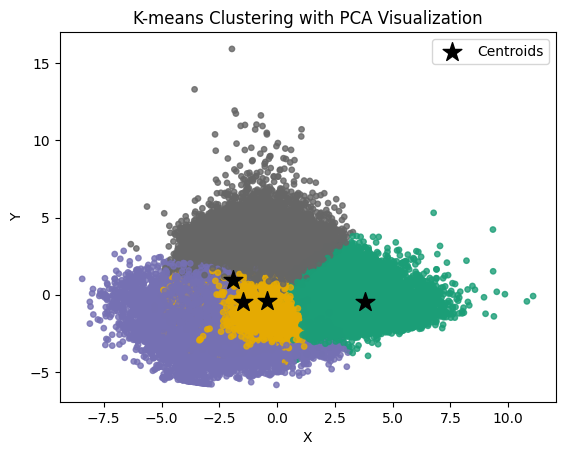

[2 2 0 ... 2 2 2]


In [31]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=Labels, cmap='Dark2', s=15, alpha=0.8)
plt.scatter(centroids_pca[:,0],centroids[:,1], color='black', marker='*', label='Centroids',s=200)
plt.title('K-means Clustering with PCA Visualization')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
print(Labels)